## Imports + Paths

In [ ]:
data_path = "/CNN/stories"
csv_path = "/CNN/CNN_with_summary.csv"
clean_csv_path = "/CNN/data_cleaned1.csv"

In [ ]:
# file = open(data_path + "/000c835555db62e319854d9f8912061cdca1893e.story", encoding='utf-8')
# text = file.read()
# file.close()
# text

In [ ]:
from os import listdir
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from statistics import stdev,mean

import warnings
warnings.filterwarnings("ignore")

## Data Extracting

In [ ]:
def load_article(file_name):
    file = open(file_name, encoding = 'utf-8')
    text = file.read()
    file.close()
    return text

In [ ]:
def split_article_story_highlight(article):
    index = article.find('@highlight')
    story, highlights = article[: index], article[index :].split('@highlight')
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [ ]:
stories = list()
for name in tqdm(listdir(data_path)):
    filename = data_path + '/' + name
    article = load_article(filename)
    story, highlights = split_article_story_highlight(article)
    stories.append({'story': story, 'highlights': highlights})
print('Loaded Stories %d' % len(stories))

  1%

*** WARNING: max output size exceeded, skipping output. ***

 63%|██████▎   | 57968/92579 [57:58<45:54, 12.57it/s]

In [ ]:
cnn_df = pd.DataFrame.from_dict(stories)
cnn_df.columns = ['article', 'summary']
cnn_df.to_csv(csv_path, index = False)

In [ ]:
CNN = pd.read_csv(csv_path)
CNN.head(1)

## Data Cleaning and Preprocessing

In [ ]:
CNN = pd.read_csv(csv_path)

In [ ]:
CNN.head(1)['summary']

Out[12]: 0    ['Syrian official: Obama climbed to the top of the tree, "doesn\'t know how to get down"', 'Obama sends a letter to the heads of the House and Senate', 'Obama to seek congressional approval on military action against Syria', 'Aim is to determine whether CW were used, not by whom, says U.N. spokesman']
Name: summary, dtype: object

In [ ]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

#### Story Preprocessing

In [ ]:
article_text = []
for i in CNN.article.values:
    new_text = re.sub(r'\n', ' ', i)
    new_text = re.sub(r'(CNN)', ' ', new_text)
    new_text = re.sub(r'LRB', ' ', new_text)
    new_text = re.sub(r'RRB', ' ', new_text)
    new_text = re.sub(r'<', ' ', new_text)
    new_text = re.sub(r'>', ' ', new_text)
    new_text = re.sub(r'[" "]+', " ", new_text)
    new_text = re.sub(r'-- ', ' ', new_text)
    new_text = re.sub(r"([?!¿])", r" \1 ", new_text)
    new_text = re.sub(r'-', ' ', new_text)
    new_text = re.sub(r'\s+', ' ', new_text)
    new_text = re.sub('[^A-Za-z0-9.,]+', ' ', new_text)
    new_text = decontracted(new_text)
    new_text = new_text.replace('/', ' ')
    new_text = new_text.lower()
    article_text.append(new_text)

In [ ]:
data_article = pd.DataFrame(article_text, columns = ['Article'])

#### Summary Preprocessing

In [ ]:
summary_text = []
for i in CNN.summary.values:
    new_text = re.sub(r'\n',' ', i)
    new_text = re.sub(r'(CNN)', ' ', new_text)
    new_text = re.sub(r'LRB', ' ', new_text)
    new_text = re.sub(r'RRB', ' ', new_text)
    new_text = re.sub(r'>', ' ', new_text)
    new_text = re.sub(r'<', ' ', new_text)
    new_text = re.sub(r'-', ' ', new_text)
    new_text = re.sub(r'[" "]+', " ", new_text)
    new_text = re.sub(r'-- ', ' ', new_text)
    new_text = re.sub(r'\s+', ' ', new_text)
    new_text = re.sub('[^A-Za-z0-9.]+', ' ', new_text)
    new_text = new_text.replace('/', ' ')
    new_text = decontracted(new_text)
    new_text = new_text.lower()
    summary_text.append(new_text)

In [ ]:
summary_text = np.array(summary_text)
summary_text = summary_text.reshape(-1, 1)

In [ ]:
data_summ = pd.DataFrame(summary_text, columns = ['Summary'])

In [ ]:
data_cleaned = data_article.join(data_summ)

In [ ]:
data_cleaned.to_csv(clean_csv_path, index = False)

## Data Analysis

In [ ]:
data_cleaned = pd.read_csv(clean_csv_path)

### Raw Data

#### length of articles

In [ ]:
art_len = []
for i in data_cleaned.Article.values:
    art_len.append(len(i.split()))

In [ ]:
b = [i for i in range(0, 100, 10)]
for i in b:
    print(i, 'th percentile is ', np.percentile(art_len, i)) 

0 th percentile is  0.0
10 th percentile is  259.0
20 th percentile is  348.0
30 th percentile is  432.0
40 th percentile is  520.0
50 th percentile is  617.0
60 th percentile is  719.0
70 th percentile is  829.0
80 th percentile is  957.0
90 th percentile is  1156.0


In [ ]:
b = [i for i in range(90, 100)]
for i in b:
    print(i, 'th percentile is ', np.percentile(art_len, i)) 

90 th percentile is  1156.0
91 th percentile is  1183.0
92 th percentile is  1216.0
93 th percentile is  1248.0
94 th percentile is  1287.0
95 th percentile is  1332.0
96 th percentile is  1383.0
97 th percentile is  1446.0
98 th percentile is  1528.0
99 th percentile is  1638.0


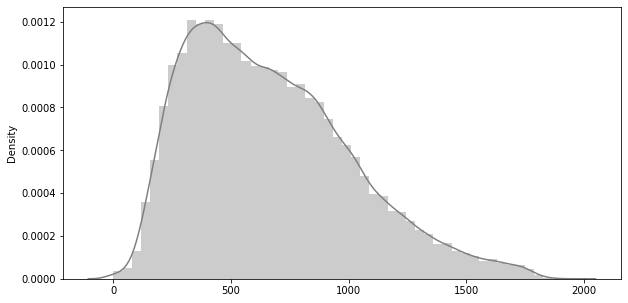

In [ ]:
plt.figure(figsize = (10, 5))
sns.distplot(art_len,color = 'grey')

#### length of Summaries

In [ ]:
summ_len = []
for i in data_cleaned.Summary.values:
    summ_len.append(len(i.split()))

In [ ]:
b = [i for i in range(0, 100, 10)]
for i in b:
    print(i, 'th percentile is ', np.percentile(summ_len, i)) 

0 th percentile is  7.0
10 th percentile is  30.0
20 th percentile is  34.0
30 th percentile is  38.0
40 th percentile is  40.0
50 th percentile is  43.0
60 th percentile is  46.0
70 th percentile is  49.0
80 th percentile is  52.0
90 th percentile is  56.0


In [ ]:
b = [i for i in range(90, 100)]
for i in b:
    print(i, 'th percentile is ', np.percentile(summ_len, i)) 

90 th percentile is  56.0
91 th percentile is  56.0
92 th percentile is  57.0
93 th percentile is  57.0
94 th percentile is  58.0
95 th percentile is  59.0
96 th percentile is  60.0
97 th percentile is  61.0
98 th percentile is  62.0
99 th percentile is  64.0


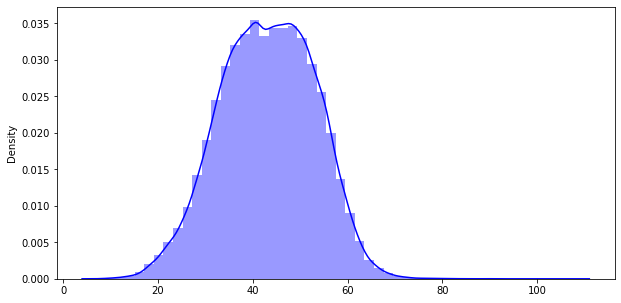

In [ ]:
plt.figure(figsize = (10, 5))
sns.distplot(summ_len,color = 'blue')

#### Calculating 90th percentile summary length confidence intervel

In [ ]:
percentiles_90 = []
for i in range(0, 200):
    samples = random.sample(summ_len, 50000)
    samples2 = random.choices(samples, k = 42579)
    perc = np.percentile(samples + samples2, 90)     
    percentiles_90.append(perc) 
mean = np.round(mean(percentiles_90), 3)
print("mean = ", mean)
std = np.round(stdev(percentiles_90), 3)
print("std = ",std)

mean = 56.0
std = 0.0


In [ ]:
sample_size = 200
left_limit = np.round(mean - 2 * (std / np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2 * (std / np.sqrt(sample_size)), 3)
print("95% of CI for MSE= ",[left_limit, right_limit])

95% of CI for MSE= [56.0, 56.0]


#### Calculating 90th percentile article length confidence intervel

In [ ]:
percentiles_90 = []
for i in range(0, 200):
    samples = random.sample(art_len, 50000)
    samples2 = random.choices(samples, k = 42579)
    perc = np.percentile(samples + samples2, 90) 
    percentiles_90.append(perc) 

In [ ]:
mean = np.round(mean(percentiles_90), 3)
print("mean = ", mean)
std = np.round(stdev(percentiles_90), 3)
print("std = ", std)

mean = 1155.375
std = 3.381


In [ ]:
sample_size = 200
left_limit = np.round(mean - 2 * (std / np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2 * (std / np.sqrt(sample_size)), 3)
print("95% of CI for MSE= ",[left_limit, right_limit])

95% of CI for MSE= [1154.897, 1155.853]


#### Calculating 95th percentile summary length confidence intervel

In [ ]:
percentiles_95 = []
for i in range(0, 200):
    samples = random.sample(summ_len, 50000)
    samples2 = random.choices(samples, k = 42579)
    perc = np.percentile(samples + samples2, 95)  
    percentiles_95.append(perc) 

In [ ]:
mean = np.round(mean(percentiles_95), 3)
print("mean = ", mean)
std = np.round(stdev(percentiles_95), 3)
print("std = ", std)

mean = 59.0
std = 0.0


In [ ]:
sample_size = 200
left_limit = np.round(mean - 2 * (std / np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2 * (std / np.sqrt(sample_size)), 3)
print("95% of CI for MSE= ",[left_limit, right_limit])

95% of CI for MSE= [59.0, 59.0]


#### Calculating 95th percentile article length confidence interve

In [ ]:
percentiles_95 =[]
for i in range(0, 200):
    samples = random.sample(art_len, 50000)
    samples2 = random.choices(samples, k = 42579)
    perc = np.percentile(samples + samples2, 95)  
    percentiles_95.append(perc) 

In [ ]:
mean = np.round(mean(percentiles_95), 3)
print("mean = ", mean)
std = np.round(stdev(percentiles_95), 3)
print("std = ", std)

mean = 1332.348
std = 3.587


In [ ]:
sample_size = 200
left_limit = np.round(mean - 2 * (std / np.sqrt(sample_size)), 3)
right_limit = np.round(mean + 2 * (std / np.sqrt(sample_size)), 3)
print("95% of CI for MSE= ",[left_limit, right_limit])

95% of CI for MSE= [1331.841, 1332.855]


#### Word cloud for summary

In [ ]:
!pip install -q wordcloud

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-7d7219c0-858e-43a1-b9c9-eb039518cc4f/bin/python -m pip install --upgrade pip' command.


In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

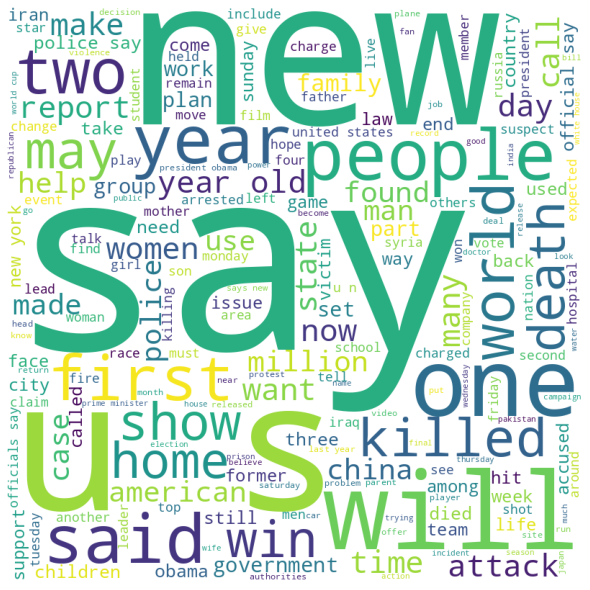

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
for value in data_cleaned.Summary: 
    value = str(value) 
    tokens = value.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens) + " "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### POS Tagging to Summary tokens

In [ ]:
!pip install -q spacy
!python -m spacy download en_core_web_lg

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-7d7219c0-858e-43a1-b9c9-eb039518cc4f/bin/python -m pip install --upgrade pip' command.
     |▏

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 587.7 MB 7.9 kB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-7d7219c0-858e-43a1-b9c9-eb039518cc4f/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy

sum_pos = []
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Summary.values):
    pos_tag = []
    article = nlp(i)
    for token in article:
        pos_tag.append(token.pos_)
    sum_pos.append(pos_tag)

  5%|▍         | 418

*** WARNING: max output size exceeded, skipping output. ***

100%|██████████| 92579/92579 [18:29<00:00, 83.47it/s]


#### Distribution of nouns and propernouns in summary

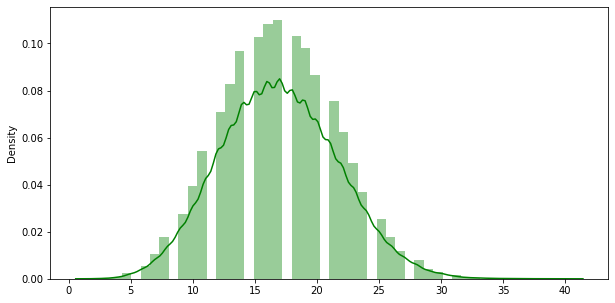

In [ ]:
noun_count = []
for i in sum_pos:
    lent = i.count('NOUN')
    lentl = i.count('PROPN')
    noun_count.append(lent + lentl)
plt.figure(figsize = (10, 5))
sns.distplot(noun_count, color = 'green')

#### Nouns and propernouns percentage in summary

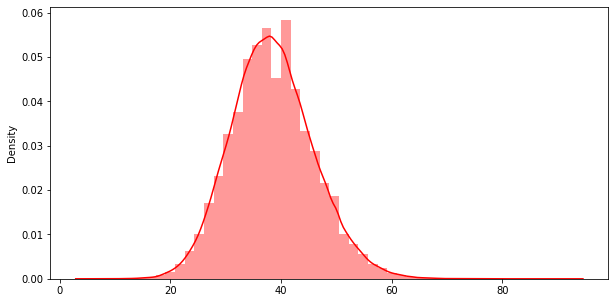

In [ ]:
noun_percent = []
for i in sum_pos:
    lent = i.count('NOUN')
    lentl = i.count('PROPN')
    noun=((lent + lentl) / len(i)) * 100
    noun_percent.append(noun)
plt.figure(figsize = (10, 5))
sns.distplot(noun_percent,color = 'red')

#### Distribution of verbs

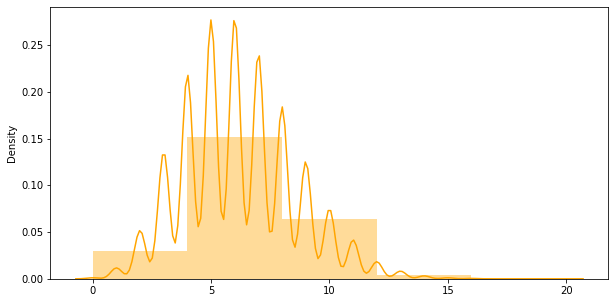

In [ ]:
verb_count = []
for i in sum_pos:
    lent = i.count('VERB')
    verb_count.append(lent)
plt.figure(figsize = (10, 5))
sns.distplot(verb_count, bins = 5, color = 'orange')

#### Verb percentage in summary

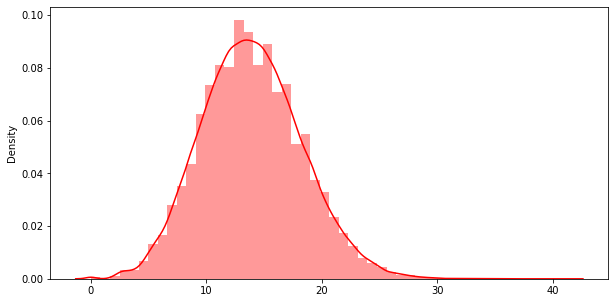

In [ ]:
verb_percent = []
for i in sum_pos:
    lent = i.count('VERB')
    verb=(lent / len(i)) * 100
    verb_percent.append(verb)
plt.figure(figsize = (10, 5))
sns.distplot(verb_percent, color = 'red')

### POS tagging to articles

In [ ]:
import spacy

art_pos = []
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Article.values):
    pos_taga = []
    article = nlp(i)
    for token in article:
        pos_taga.append(token.pos_)
    art_pos.append(pos_taga)

  1%|          | 8

*** WARNING: max output size exceeded, skipping output. ***

100%|██████████| 92579/92579 [2:28:53<00:00, 10.36it/s]


#### Nouns and Proper nouns percentage in articles

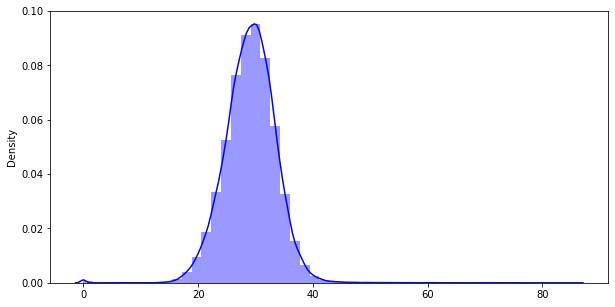

In [ ]:
noun_percent = []
for i in art_pos:
    lent = i.count('NOUN')
    lentl = i.count('PROPN')
    noun=((lent + lentl) / len(i)) * 100
    noun_percent.append(noun)
plt.figure(figsize = (10, 5))
sns.distplot(noun_percent, color = 'blue')

#### Verbs percentage

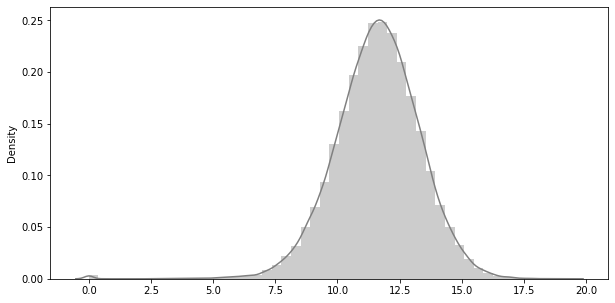

In [ ]:
verb_percent = []
for i in art_pos:
    lent = i.count('VERB')
    verb=(lent / len(i)) * 100
    verb_percent.append(verb)
plt.figure(figsize = (10, 5))
sns.distplot(verb_percent, color = 'grey')

#### Visualising Named Entities in text

In [ ]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML

nlp = spacy.load("en_core_web_lg")

article2 = nlp(data_cleaned.Article.values[2])
displacy.render(article2, style = "ent", jupyter = True)

kansas city
 GPE 
 
, 
 
 missouri
 GPE 
 
 the general services administration, already under investigation for lavish spending, allowed an employee to telecommute from 
 
 hawaii
 GPE 
 
 even though he is based at the gsa is 
 
 kansas city
 GPE 
 
, 
 
 missouri
 GPE 
 
, office, a investigation has found. it cost 
 
 more than 24,000
 CARDINAL 
 
 for the business development specialist to travel to and from the mainland united states over 
 
 the past year
 DATE 
 
. he is among 
 
 several hundred
 CARDINAL 
 
 gsa virtual workers who also travel to various conferences and their home offices, costing the agency 
 
 millions of dollars
 MONEY 
 
 over 
 
 the past three years
 DATE 
 
. under the program, employees work from home and may live in another state from the region in which they are actually assigned. the 
 
 kansas city
 GPE 
 
 employee, who started his job in 
 
 january 2011
 DATE 
 
, is paid 
 
 84,440
 CARDINAL 
 
 and works from his home in 
 
 honolulu
 GPE 
 
, a gsa representative confirmed. in 
 
 the past year
 DATE 
 
, according to gsa travel records, the employee has flown back to the mainland 
 
 nine
 CARDINAL 
 
 times for conferences and meetings. 
 
 four
 CARDINAL 
 
 of those trips were to 
 
 st
 GPE 
 
. 
 
 louis four
 PERSON 
 
 were to 
 
 washington
 GPE 
 
, with a side trip to 
 
 cincinnati
 GPE 
 
 and 
 
 one
 CARDINAL 
 
 was to 
 
 san diego
 GPE 
 
. the total cost to taxpayers was 
 
 24,221
 CARDINAL 
 
. 
 
 jason klumb
 PERSON 
 
, the gsa is regional administrator for 
 
 kansas city
 GPE 
 
, defended the hire. the cost of that travel was included in the consideration of his candidacy as an employee as compared with the other applicants, 
 
 klumb
 ORG 
 
 said. and when factoring all of those in, it was determined that he was the best candidate, even in light of the cost that would be incurred. 
 
 klumb
 PERSON 
 
 called the gsa is teleworking program a successful program that is going to lead to cost savings for taxpayers. but a gsa spokeswoman said, we are not going to defend this type of travel. and a gsa employee in 
 
 kansas city
 GPE 
 
, who requested anonymity, said that hiring someone in 
 
 hawaii
 GPE 
 
 to work for the 
 
 kansas city
 GPE 
 
 region was ludicrous. it does not make sense, the employee said. when you consider everything you need when you hire someone, it would have been better to look for someone in the 
 
 kansas city
 GPE 
 
 area. it would have reduced the cost of travel by 
 
 at least 70 percent
 PERCENT 
 
 when you look at just the airfare of what it takes to from 
 
 honolulu
 GPE 
 
 to 
 
 washington
 GPE 
 
, 
 
 d.c.
 GPE 
 
, where a lot of business is done. 
 
 dan tangherlini
 PERSON 
 
, who was appointed acting gsa administrator 
 
 this year
 DATE 
 
, said the agency was examining the cost of the entire teleworking program. i think the most important part for the gsa to think about is make sure we open ourselves up, avail ourselves to all the smart people in the country, but then also make sure we have a clear business case, he said. if we have someone who is working in 
 
 nebraska
 GPE 
 
 but reporting to 
 
 boston
 GPE 
 
, there has to be a clear explanation for what value they are providing, and you have got to give me the business case. you have got to explain to me why that is a cost effective move for the 
 
 american
 NORP 
 
 people, and that is a new standard that we are asking everyone at gsa to adhere to. the gsa virtual employee program is different from telework programs offered by many private companies including is parent company, turner broadcasting, in which some employees are encouraged to work from home 
 
 some days of the week
 DATE 
 
, partially to reduce traffic congestion. 
 
 the house committee
 ORG 
 
 on oversight and government reform requested details about the gsa is teleworking program in 
 
 june
 DATE 
 
. that followed disclosures that 
 
 95
 CARDINAL 
 
 virtual employees, inc

#### Visualising Named Entities in summary

In [ ]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML

nlp = spacy.load("en_core_web_lg")

article2 = nlp(data_cleaned.Summary.values[2])
displacy.render(article2, style = "ent", jupyter = True)

the employee in agency is 
 
 kansas city
 GPE 
 
 office is among 
 
 hundreds
 CARDINAL 
 
 of virtual workers the employee is travel to and from the mainland 
 
 u.s.
 GPE 
 
 
 
 last year
 DATE 
 
 cost 
 
 more than 24 000
 MONEY 
 
 the telecommuting program like all gsa practices is under review

### Appending named entities for all articles and summaries for further analysis

In [ ]:
import spacy

sum_ent = []
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Summary.values):
    pos_tag = []
    article = nlp(i)
    for token in article.ents:
        pos_tag.append(token.label_)
    sum_ent.append(pos_tag)

  4%|▍         | 4160

*** WARNING: max output size exceeded, skipping output. ***

100%|██████████| 92579/92579 [18:31<00:00, 83.27it/s]


In [ ]:
import spacy

art_ent = []
nlp = spacy.load("en_core_web_lg")
for i in tqdm(data_cleaned.Article.values):
    pos_tag = []
    article = nlp(i)
    for token in article.ents:
        pos_tag.append(token.label_)
    art_ent.append(pos_tag)

  1%|          | 87

*** WARNING: max output size exceeded, skipping output. ***

100%|██████████| 92579/92579 [2:27:19<00:00, 10.47it/s]


#### Percentage distribution of named entities in summaries

Out[69]: Text(0.5, 1.0, 'Percentage distribution of named entities in summaries')

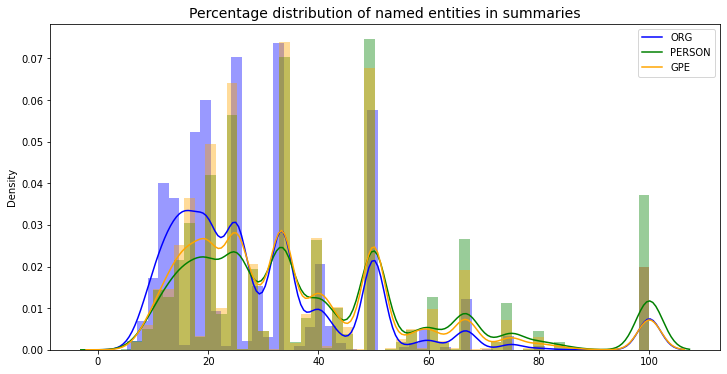

In [ ]:
org_percent = []
per_percent = []
gpe_percent = []
for i in sum_ent:
    lent1 = i.count('ORG')
    lent2 = i.count('PERSON')
    lent3 = i.count('GPE')
    if lent1 > 0:
        lent_org=(lent1 / len(i)) * 100
    if lent2 > 0:
        lent_per = (lent2 / len(i)) * 100
    if lent3 > 0:
        lent_gpe = (lent3 / len(i)) * 100
    org_percent.append(lent_org)
    per_percent.append(lent_per)
    gpe_percent.append(lent_gpe)
plt.figure(figsize = (12, 6))
sns.distplot(org_percent,color = 'blue')
sns.distplot(per_percent,color = 'green')
sns.distplot(gpe_percent,color = 'orange')
plt.legend(['ORG', 'PERSON', 'GPE'])
plt.title("Percentage distribution of named entities in summaries", size = 14)